<a href="https://colab.research.google.com/github/a-kalaam/my-deep-learning-path/blob/main/AlexNet%20with%20Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar100

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

In [8]:
#Preprrocessing
train_images=train_images.reshape((50000, 32, 32, 3))
test_images=test_images.reshape((10000, 32, 32, 3))

In [9]:

train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
train_images.shape

(50000, 32, 32, 3)

In [11]:
nb_classes = len(np.unique(train_labels))

In [12]:
train_labels = tf.keras.utils.to_categorical(train_labels, 100)
test_labels = tf.keras.utils.to_categorical(test_labels, 100)

In [18]:
#define the model
model=Sequential()
model.add(Conv2D(96,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [19]:
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         409,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,687,268 (143.77 MB)

 Trainable params: 37,687,268 (143.77 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=25,validation_data=(test_images,test_labels))

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.2180 - loss: 3.2014 - val_accuracy: 0.2825 - val_loss: 2.9139
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.2820 - loss: 2.8799 - val_accuracy: 0.3325 - val_loss: 2.6495
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.3365 - loss: 2.6116 - val_accuracy: 0.3622 - val_loss: 2.5290
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.3857 - loss: 2.3678 - val_accuracy: 0.3939 - val_loss: 2.3962
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.4358 - loss: 2.1428 - val_accuracy: 0.4054 - val_loss: 2.3278
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.4859 - loss: 1.9059 - val_accuracy: 0.4361 - val_loss: 2.2009
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.5430 - loss: 1.6807 - val_accuracy: 0.4348 - val_loss: 2.2127
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.6030 - loss: 1.4291 - 

Test loss: 3.194384813308716 / Test accuracy: 0.46549999713897705


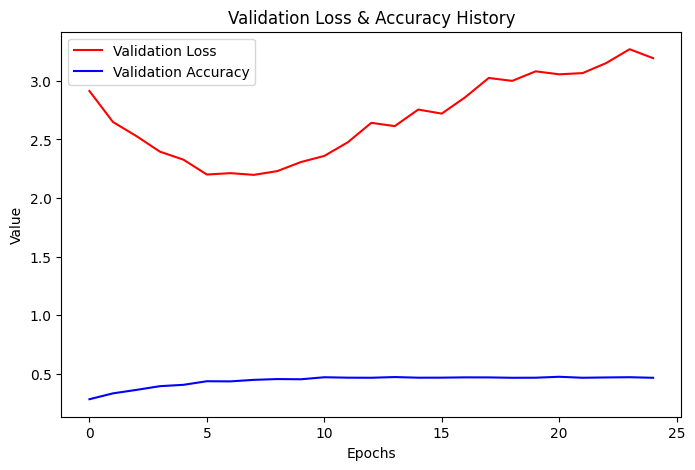

In [31]:
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=0)
print(f'Test loss: {test_loss} / Test accuracy: {test_acc}')

# Create a single figure
plt.figure(figsize=(8, 5))

# Plot both loss and accuracy on the same graph
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Validation Loss & Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

NameError: name 'datagen' is not defined

In [34]:
evaluate=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4691 - loss: 3.1732
